# Investment Value

In [23]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [2]:
# Set current amount of shares data
MSFT_Shares = 200
AAPL_Shares = 320

# Set the tickers
tickers = ['MSFT', 'AAPL']

# Create the shares DataFrame
amt_shares_df = pd.DataFrame({'Shares':[MSFT_Shares, AAPL_Shares]},index=tickers)


# Display shares data
amt_shares_df

,Shares
MSFT,200
AAPL,320


In [3]:
# Load .env environment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Verify that Alpaca key and secret were correctly loaded
type_Al_API =type(alpaca_api_key)
type_Al_Secret =type(alpaca_secret_key)
print(f"Alpaca Key type: {type_Al_API}")
print(f"Alpaca Secret Key type: {type_Al_Secret}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [7]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-19", tz="America/New_York").isoformat()

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio


AAPL                                       MSFT  \
                              open    high     low    close    volume    open   
2020-08-19 00:00:00-04:00  463.933  468.65  462.44  462.825  33874948  211.49   

                                                           
                            high     low  close    volume  
2020-08-19 00:00:00-04:00  212.1  209.25  209.7  21610351

## Calculate the current value in dollars of the stock portfolio

In [10]:
# Fetch the closing prices of FB and TWTR
AAPL_closing_prices = df_portfolio.iat[0,3]
MSFT_closing_prices = df_portfolio.iat[0,8]
AAPL_closing_prices

462.825

In [12]:
type(AAPL_closing_prices)

numpy.float64

In [13]:
amt_shares_df.iat[1,0]

320

In [15]:
AAPL_value =AAPL_closing_prices * amt_shares_df.iat[1,0]
MSFT_value = MSFT_closing_prices * amt_shares_df.iat[0,0]


print(f'The current value of the {amt_shares_df.iat[0,0]} MSFT shares is ${MSFT_value:,.2f}')
print(f'The current value of the {amt_shares_df.iat[1,0]} AAPL shares is ${AAPL_value:,.2f}')

The current value of the 200 MSFT shares is $41,940.00
The current value of the 320 AAPL shares is $148,104.00


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [18]:
value_of_shares_df = pd.DataFrame({'MSFT':[MSFT_value],'AAPL': [AAPL_value]})
value_of_shares_df

,MSFT,AAPL
0,41940.0,148104.0


In [26]:
labels = ['MSFT', 'AAPL']
sizes = [MSFT_value, AAPL_value]

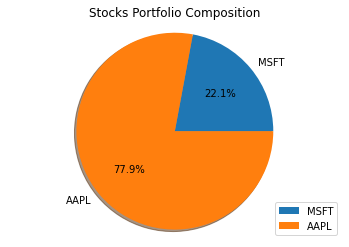

In [59]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal') 
ax1.legend(loc=4)
ax1.set_title('Stocks Portfolio Composition')
plt.show()

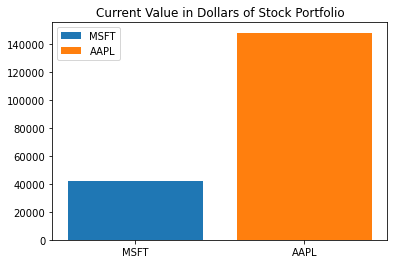

In [55]:
fig, ax = plt.subplots()
plt.bar(['MSFT'], [MSFT_value], label="MSFT")
plt.bar(['AAPL'], [AAPL_value], label="AAPL")
ax.set_title('Current Value in Dollars of Stock Portfolio')
plt.legend()
plt.show()